In [2]:
# EV MARKET SEGMENTATION PROJECT – FINAL NOTEBOOK (Based on Full Task Requirements)
# ------------------------------------------------------------------------------
# GOAL: Help an EV startup identify the best demographic segment to target using
# segmentation analysis of Customers.csv (demographic data). Propose a clear EV
# market entry strategy aligned with the Innovation Adoption Life Cycle.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# ------------------------------------------------------------------------------
# STEP 1: DECIDING TO SEGMENT
# ------------------------------------------------------------------------------
# Segmentation allows the startup to identify which customer segments are most
# likely to adopt EVs early based on age, income, lifestyle, family context, and
# profession.

# ------------------------------------------------------------------------------
# STEP 2: SPECIFYING THE IDEAL SEGMENT
# ------------------------------------------------------------------------------
# Ideal EV customer:
# - Age 26–50 (tech-savvy, working professionals)
# - Income ₹5–10L (affordability)
# - High spending score (open to innovation)
# - Family size: 2–4 (compact or family EV preference)
# - Profession: Urban, educated (professionals/business)


In [4]:
# ------------------------------------------------------------------------------
# STEP 3: COLLECTING & CLEANING DATA
# ------------------------------------------------------------------------------
df = pd.read_csv("Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [8]:
# Check for missing values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [9]:
# 1. Fix missing values in 'Profession'
df['Profession'].fillna('Other', inplace=True)

C:\Users\ipg 3\AppData\Local\Temp\ipykernel_18164\3013958190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profession'].fillna('Other', inplace=True)


In [10]:
df['Profession'].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Other             35
Name: count, dtype: int64

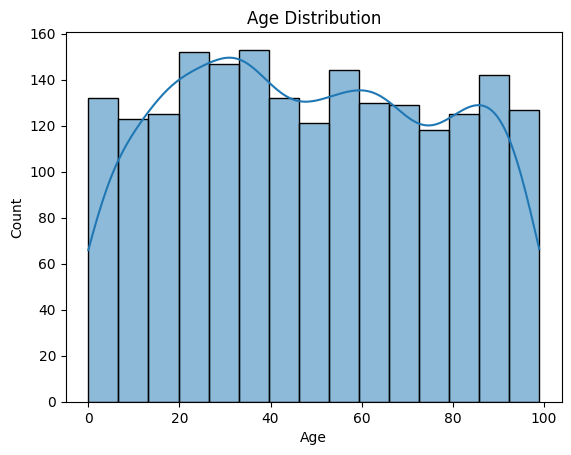

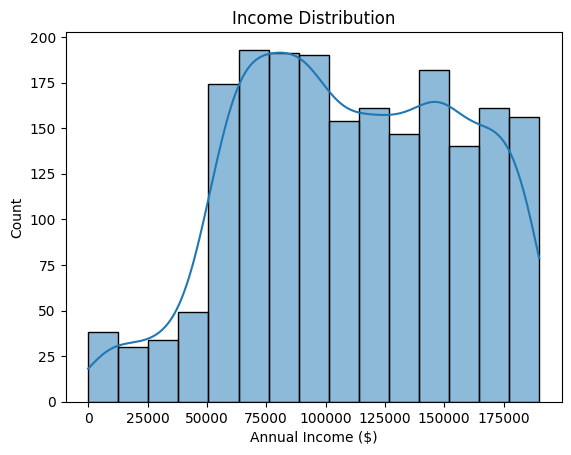

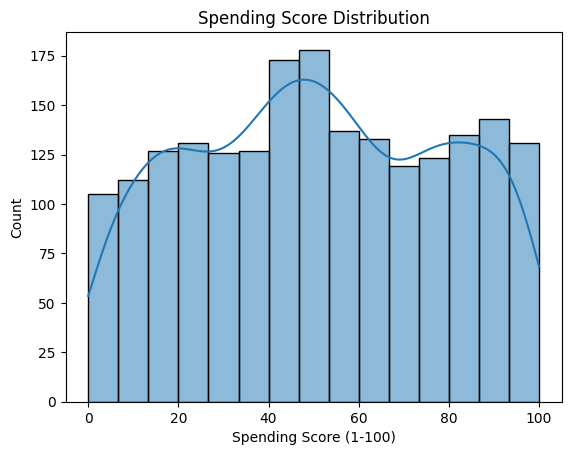

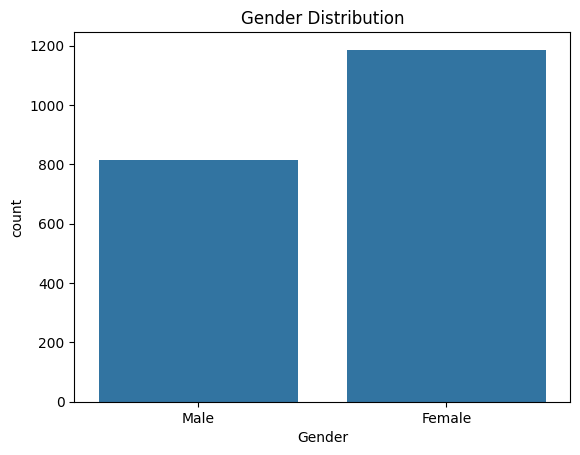

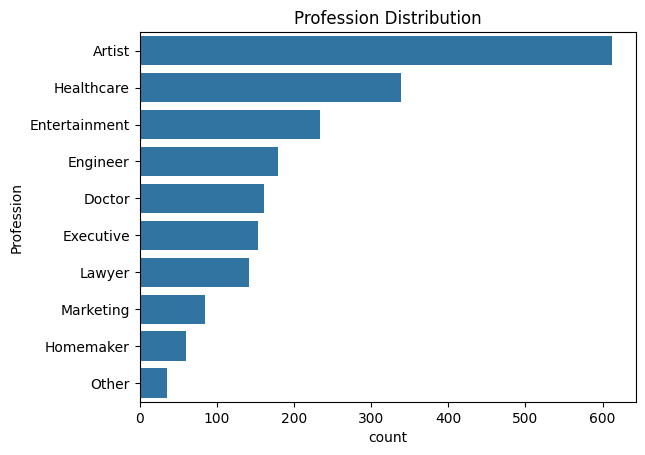

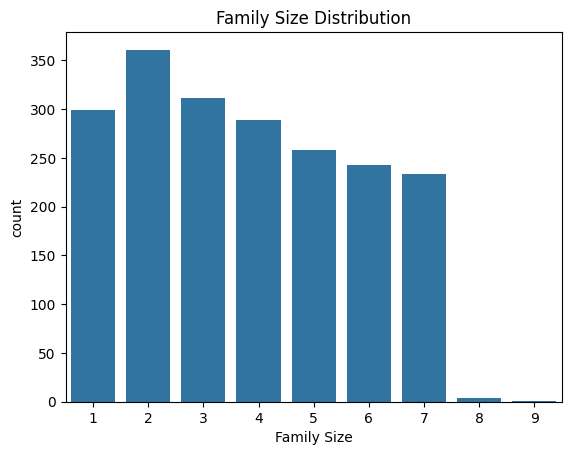

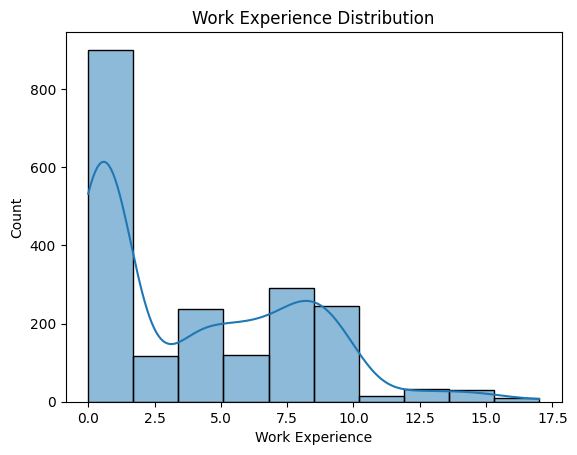

In [11]:
# ------------------------------------------------------------------------------
# STEP 4: EXPLORATORY DATA ANALYSIS (EDA)
# ------------------------------------------------------------------------------

sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Annual Income ($)'], kde=True, bins=15)
plt.title('Income Distribution')
plt.show()

sns.histplot(df['Spending Score (1-100)'], kde=True, bins=15)
plt.title('Spending Score Distribution')
plt.show()

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(y='Profession', data=df, order=df['Profession'].value_counts().index)
plt.title('Profession Distribution')
plt.show()

sns.countplot(x='Family Size', data=df)
plt.title('Family Size Distribution')
plt.show()

sns.histplot(df['Work Experience'], kde=True, bins=10)
plt.title('Work Experience Distribution')
plt.show()

In [ ]:
# ------------------------------------------------------
# CLEANING & DERIVED VARIABLES FOR SEGMENTATION
# ------------------------------------------------------

# 1. Create realistic Age Groups based on your data (min=18, max=70)
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[17, 25, 35, 50, 70],
    labels=['18–25', '26–35', '36–50', '51+']
)

# 2. Create realistic Income Groups (your max income is ₹1.89 lakh)
df['Income_Group'] = pd.cut(
    df['Annual Income ($)'],
    bins=[0, 70000, 120000, 200000],
    labels=['Low', 'Middle', 'High']
)


# 3. Create Spending Score Level (your median = 50, 75th percentile = 74)
df['Spending_Level'] = pd.cut(
    df['Spending Score (1-100)'],
    bins=[0, 40, 70, 100],
    labels=['Low', 'Medium', 'High']
)


In [13]:
# Average values by Age Group
age_profile = df.groupby('Age_Group')[['Annual Income ($)', 'Spending Score (1-100)', 'Family Size']].mean().round(1)
print("🔹 Age Group Profile:")
print(age_profile)

# Average values by Income Group
income_profile = df.groupby('Income_Group')[['Age', 'Spending Score (1-100)', 'Family Size']].mean().round(1)
print("🔹 Income Group Profile:")
print(income_profile)

# Average values by Spending Level
spend_profile = df.groupby('Spending_Level')[['Age', 'Annual Income ($)', 'Family Size']].mean().round(1)
print("🔹 Spending Level Profile:")
print(spend_profile)


🔹 Age Group Profile:
           Annual Income ($)  Spending Score (1-100)  Family Size
Age_Group                                                        
18–25               104249.5                    52.5          3.6
26–35               101039.5                    51.5          3.5
36–50               104278.0                    48.6          3.8
51+                 110414.2                    50.7          3.7
🔹 Income Group Profile:
               Age  Spending Score (1-100)  Family Size
Income_Group                                           
Low           46.1                    49.8          3.5
Middle        50.4                    50.5          3.7
High          49.2                    51.9          3.9
🔹 Spending Level Profile:
                 Age  Annual Income ($)  Family Size
Spending_Level                                      
Low             49.8           110420.6          3.8
Medium          49.9           110963.9          3.8
High            46.8           111031.9  

C:\Users\ipg 3\AppData\Local\Temp\ipykernel_18164\2899716474.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_profile = df.groupby('Age_Group')[['Annual Income ($)', 'Spending Score (1-100)', 'Family Size']].mean().round(1)
C:\Users\ipg 3\AppData\Local\Temp\ipykernel_18164\2899716474.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_profile = df.groupby('Income_Group')[['Age', 'Spending Score (1-100)', 'Family Size']].mean().round(1)
C:\Users\ipg 3\AppData\Local\Temp\ipykernel_18164\2899716474.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

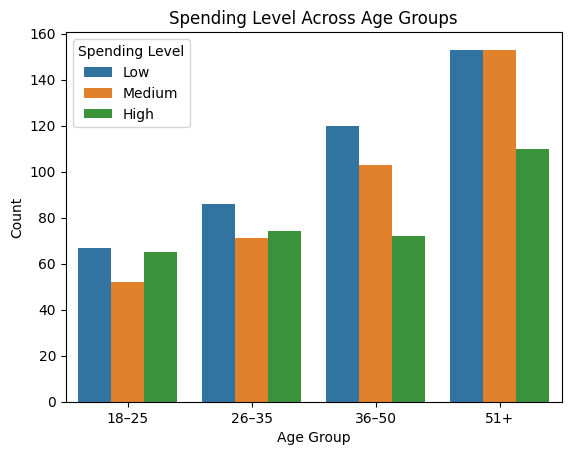

In [14]:
sns.countplot(data=df, x='Age_Group', hue='Spending_Level')
plt.title('Spending Level Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Spending Level')
plt.show()


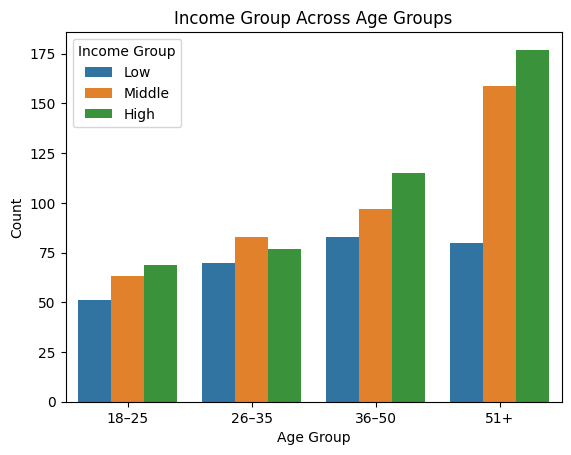

In [15]:
sns.countplot(data=df, x='Age_Group', hue='Income_Group')
plt.title('Income Group Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Income Group')
plt.show()


C:\Users\ipg 3\AppData\Local\Temp\ipykernel_18164\1346045438.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


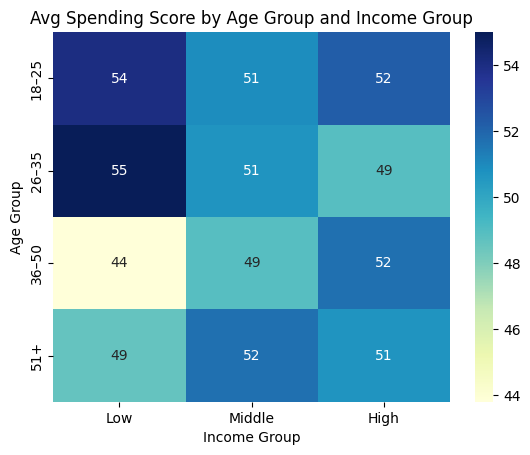

In [16]:
heatmap_data = df.pivot_table(
    values='Spending Score (1-100)',
    index='Age_Group',
    columns='Income_Group',
    aggfunc='mean'
).round(1)

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Avg Spending Score by Age Group and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Age Group')
plt.show()


In [17]:
# Compute percentiles
income_25, income_50, income_75 = df['Annual Income ($)'].quantile([0.25, 0.50, 0.75])
age_25, age_50, age_75         = df['Age'].quantile([0.25, 0.50, 0.75])
spend_25, spend_50, spend_75   = df['Spending Score (1-100)'].quantile([0.25, 0.50, 0.75])
fam_50                         = df['Family Size'].median()

print(f"Income p25/p50/p75: {income_25:.0f}/{income_50:.0f}/{income_75:.0f}")
print(f"Age    p25/p50/p75: {age_25:.0f}/{age_50:.0f}/{age_75:.0f}")
print(f"Spend  p25/p50/p75: {spend_25:.0f}/{spend_50:.0f}/{spend_75:.0f}")
print(f"Family median:     {fam_50:.0f}")


Income p25/p50/p75: 74572/110045/149093
Age    p25/p50/p75: 25/48/73
Spend  p25/p50/p75: 28/50/75
Family median:     4


In [18]:
def assign_segment_pct(row):
    # Urban EV Adopters: top quartile spenders & earners in professional roles
    if (
        row['Profession'] in ['Engineer','Executive','Doctor','Lawyer','Marketing','Artist'] and
        (row['Annual Income ($)'] >= income_50 or row['Spending Score (1-100)'] >= spend_50) and
        row['Age'] >= age_25 and row['Age'] <= age_75
    ):
        return 'Urban EV Adopters'
    
    # Creative Young Spenders: younger than median, high spenders
    elif (
        row['Age'] < age_50 and
        row['Spending Score (1-100)'] >= spend_75
    ):
        return 'Creative Young Spenders'
    
    # Stable Middle-Class: income >= median & family >= median
    elif (
        row['Annual Income ($)'] >= income_25 and
        row['Family Size'] >= fam_50
    ):
        return 'Stable Middle-Class'
    
    # Conservative Non-Adopters: age above 75th percentile or homemaker
    elif (
        row['Age'] > age_75 or
        row['Profession'] == 'Homemaker'
    ):
        return 'Conservative Non-Adopters'
    
    # Everyone else
    else:
        return 'General Segment'

# Apply new segmentation
df['Segment'] = df.apply(assign_segment_pct, axis=1)
print(df['Segment'].value_counts())


Segment
Stable Middle-Class          519
General Segment              515
Urban EV Adopters            480
Conservative Non-Adopters    297
Creative Young Spenders      189
Name: count, dtype: int64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Summary Statistics per Segment
profile_stats = df.groupby('Segment')[
    ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']
].agg(['count','mean','std']).round(1)
print("\n🔹 Segment Summary Statistics:\n")
print(profile_stats.to_markdown())


🔹 Segment Summary Statistics:

| Segment                   |   ('Age', 'count') |   ('Age', 'mean') |   ('Age', 'std') |   ('Annual Income ($)', 'count') |   ('Annual Income ($)', 'mean') |   ('Annual Income ($)', 'std') |   ('Spending Score (1-100)', 'count') |   ('Spending Score (1-100)', 'mean') |   ('Spending Score (1-100)', 'std') |   ('Family Size', 'count') |   ('Family Size', 'mean') |   ('Family Size', 'std') |
|:--------------------------|-------------------:|------------------:|-----------------:|---------------------------------:|--------------------------------:|-------------------------------:|--------------------------------------:|-------------------------------------:|------------------------------------:|---------------------------:|--------------------------:|-------------------------:|
| Conservative Non-Adopters |                297 |              82.5 |             17.6 |                              297 |                        101796   |                        

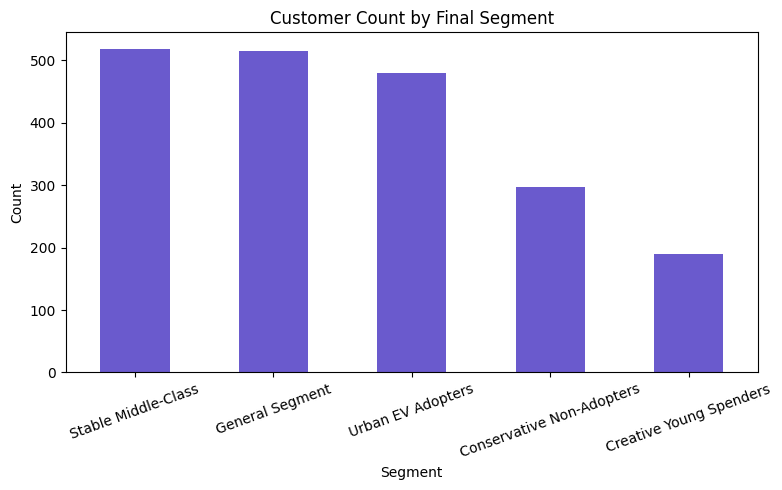

In [20]:
# 2️⃣ Segment Counts Bar Chart
plt.figure(figsize=(8,5))
df['Segment'].value_counts().plot(kind='bar', color='slateblue')
plt.title('Customer Count by Final Segment')
plt.ylabel('Count')
plt.xlabel('Segment')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

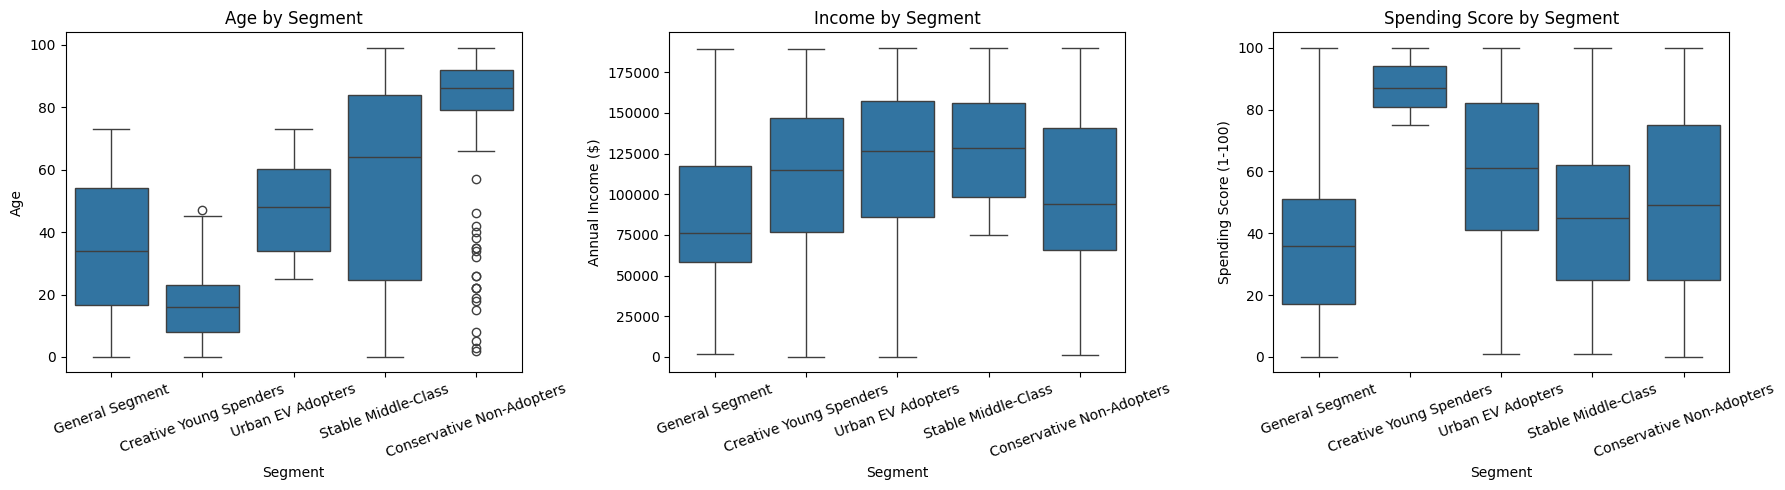

In [21]:
# 3️⃣ Boxplots: Age, Income, Spending by Segment
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.boxplot(ax=axes[0], x='Segment', y='Age', data=df)
axes[0].set_title('Age by Segment')
axes[0].tick_params(axis='x', rotation=20)

sns.boxplot(ax=axes[1], x='Segment', y='Annual Income ($)', data=df)
axes[1].set_title('Income by Segment')
axes[1].tick_params(axis='x', rotation=20)

sns.boxplot(ax=axes[2], x='Segment', y='Spending Score (1-100)', data=df)
axes[2].set_title('Spending Score by Segment')
axes[2].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

C:\Users\ipg 3\AppData\Local\Temp\ipykernel_18164\3314137279.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Family Size', data=df, estimator='mean', ci=None, palette='pastel')
C:\Users\ipg 3\AppData\Local\Temp\ipykernel_18164\3314137279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Family Size', data=df, estimator='mean', ci=None, palette='pastel')


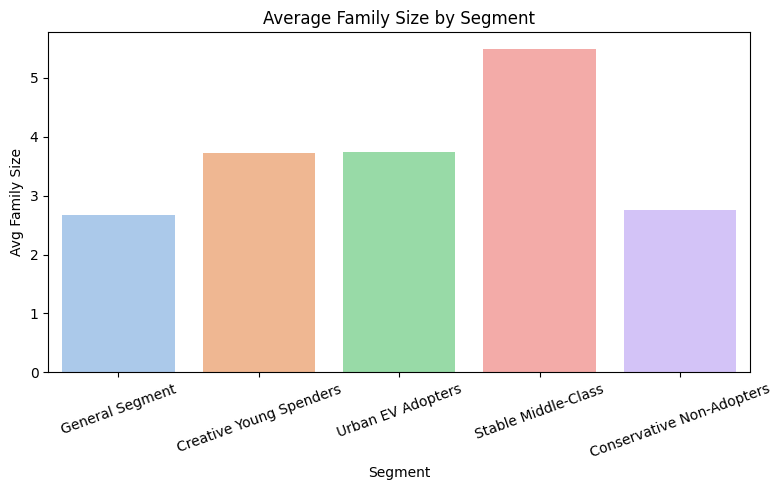

In [22]:
# 4️⃣ Mean Family Size per Segment
plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Family Size', data=df, estimator='mean', ci=None, palette='pastel')
plt.title('Average Family Size by Segment')
plt.ylabel('Avg Family Size')
plt.xlabel('Segment')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


🔹 Profession Mix by Segment:

| Segment                   |   Artist |   Doctor |   Engineer |   Entertainment |   Executive |   Healthcare |   Homemaker |   Lawyer |   Marketing |   Other |
|:--------------------------|---------:|---------:|-----------:|----------------:|------------:|-------------:|------------:|---------:|------------:|--------:|
| Conservative Non-Adopters |       86 |       18 |         29 |              40 |          17 |           45 |          31 |       15 |          14 |       2 |
| Creative Young Spenders   |       49 |       22 |          9 |              29 |          13 |           40 |           8 |       11 |           4 |       4 |
| General Segment           |      124 |       37 |         38 |              78 |          34 |          133 |           0 |       37 |          24 |      10 |
| Stable Middle-Class       |      115 |       28 |         45 |              87 |          34 |          121 |          21 |       32 |          17 |      19 |
| U

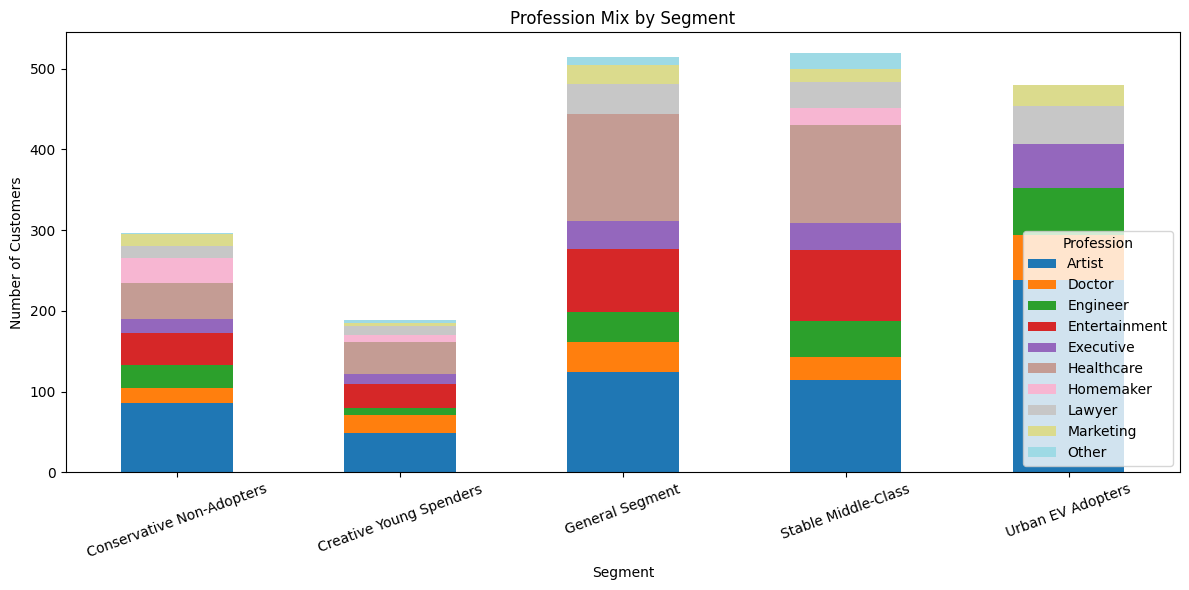

In [23]:
# 5️⃣ Profession Mix by Segment
prof_mix = pd.crosstab(df['Segment'], df['Profession'])
print("\n🔹 Profession Mix by Segment:\n")
print(prof_mix.to_markdown())

prof_mix.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Profession Mix by Segment')
plt.ylabel('Number of Customers')
plt.xlabel('Segment')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

C:\Users\ipg 3\AppData\Local\Temp\ipykernel_18164\3505450876.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_spend = df.pivot_table(


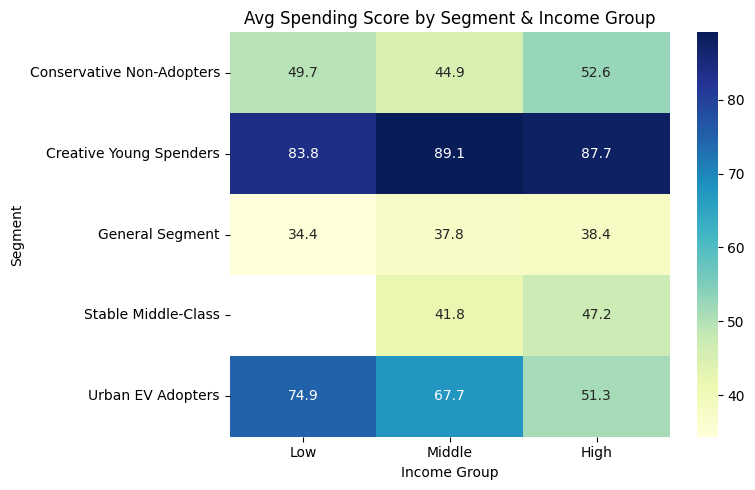

In [24]:
# 6️⃣ Heatmap: Avg Spending Score by Segment & Income_Group
heat_spend = df.pivot_table(
    index='Segment',
    columns='Income_Group',
    values='Spending Score (1-100)',
    aggfunc='mean'
).round(1)

plt.figure(figsize=(8,5))
sns.heatmap(heat_spend, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Avg Spending Score by Segment & Income Group')
plt.ylabel('Segment')
plt.xlabel('Income Group')
plt.tight_layout()
plt.show()

C:\Users\ipg 3\AppData\Local\Temp\ipykernel_18164\4103466935.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_inc = df.pivot_table(


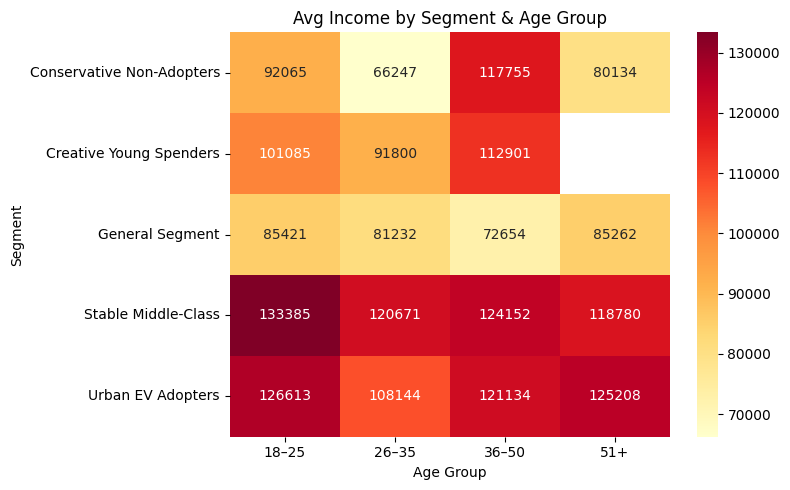

In [25]:
# 7️⃣ Heatmap: Avg Income by Segment & Age_Group
heat_inc = df.pivot_table(
    index='Segment',
    columns='Age_Group',
    values='Annual Income ($)',
    aggfunc='mean'
).round(0)

plt.figure(figsize=(8,5))
sns.heatmap(heat_inc, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Avg Income by Segment & Age Group')
plt.ylabel('Segment')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

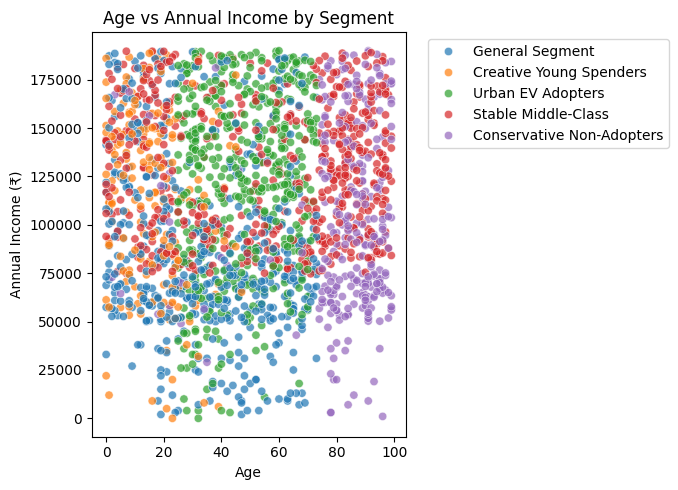

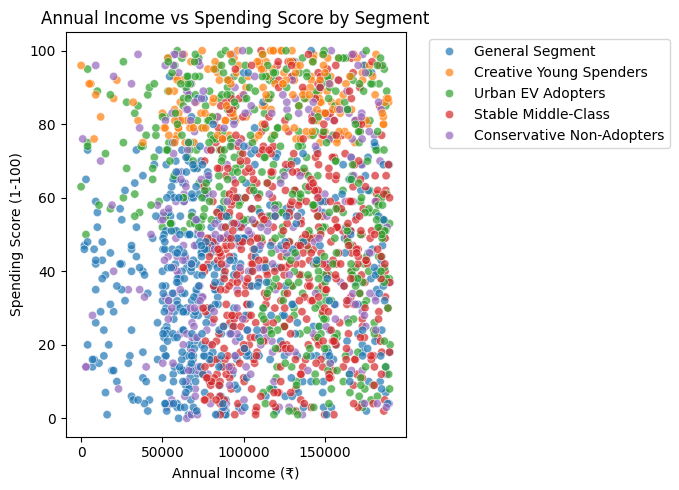

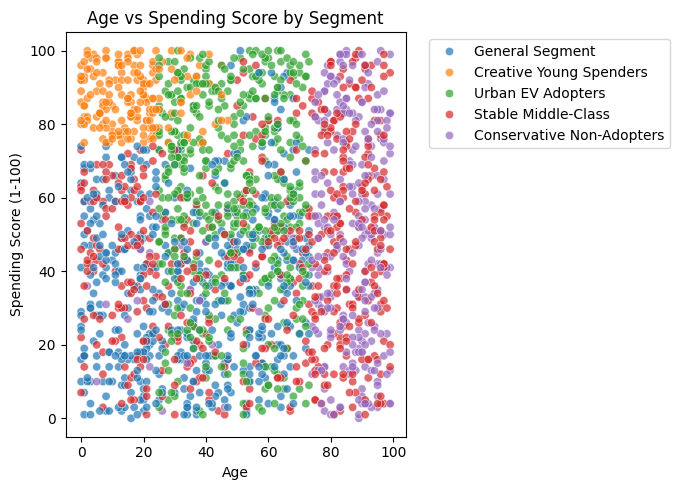

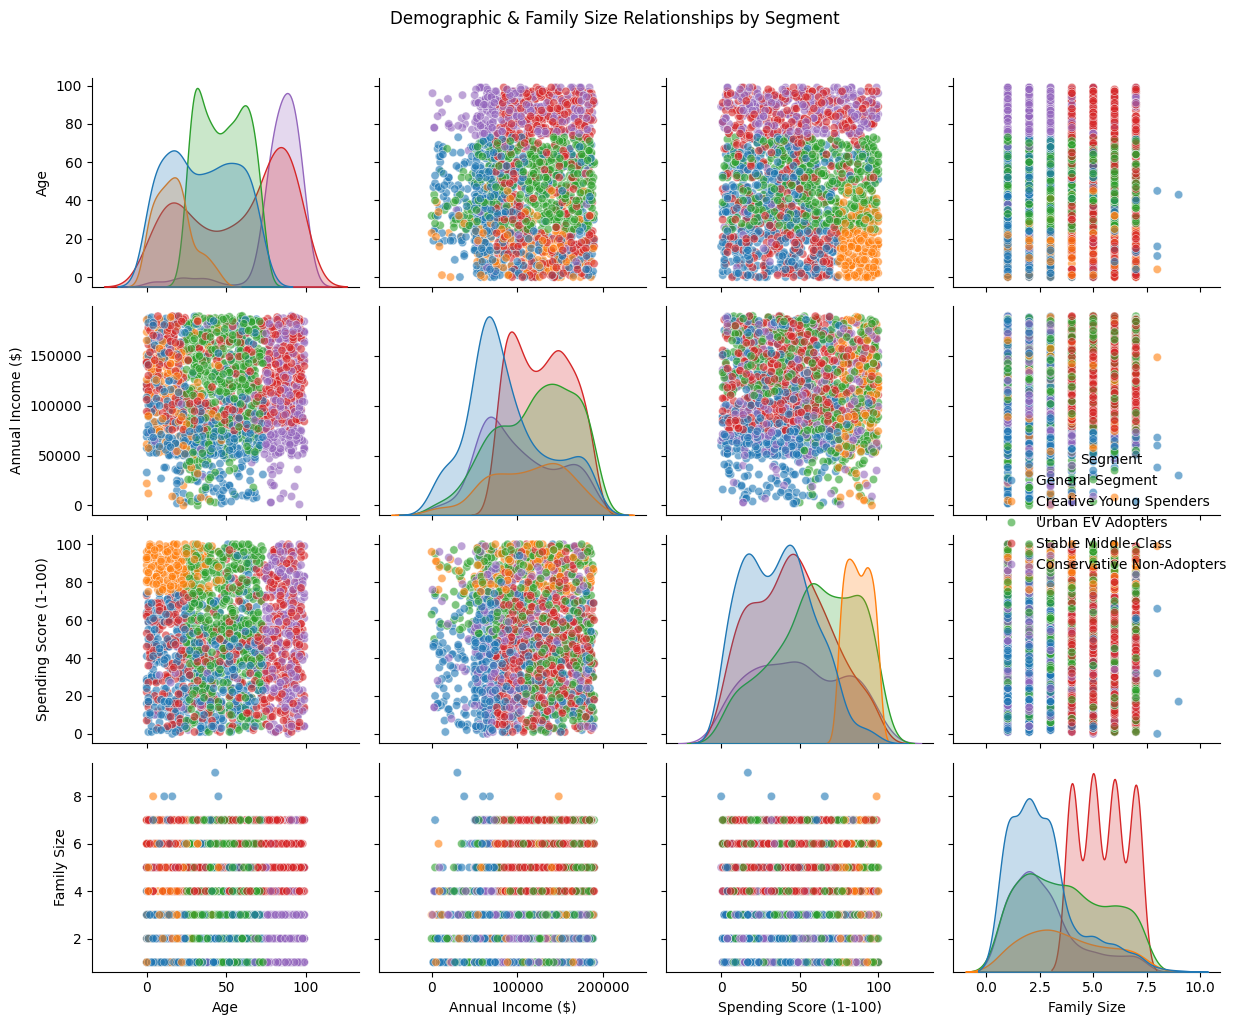

In [ ]:
# ------------------------------------------------------------------------------
#  RELATIONSHIP PLOTS
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Age vs Annual Income by Segment
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Age', y='Annual Income ($)', hue='Segment', alpha=0.7)
plt.title("Age vs Annual Income by Segment")
plt.xlabel("Age")
plt.ylabel("Annual Income (₹)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 2️⃣ Annual Income vs Spending Score by Segment
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Annual Income ($)', y='Spending Score (1-100)', hue='Segment', alpha=0.7)
plt.title("Annual Income vs Spending Score by Segment")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Spending Score (1-100)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 3️⃣ Age vs Spending Score by Segment
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Segment', alpha=0.7)
plt.title("Age vs Spending Score by Segment")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 4️⃣ Pairplot of Key Demographics + Family Size
# Rename for plotting
df_plot = df.rename(columns={'Family_Size': 'Family Size'})
sns.pairplot(
    df_plot[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size', 'Segment']],
    hue='Segment',
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle("Demographic & Family Size Relationships by Segment", y=1.02)
plt.tight_layout()
plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1️⃣ Select numeric features + one‑hot Profession
num_cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']
X_num = df[num_cols]
X_prof = pd.get_dummies(df['Profession'], prefix='Prof')
X = pd.concat([X_num, X_prof], axis=1)

# 2️⃣ Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Fit KMeans (choose k via elbow or silhouette; here k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 4️⃣ Inspect cluster sizes
print("Cluster sizes:\n", df['Cluster'].value_counts())


Cluster sizes:
 Cluster
0    826
1    626
2    234
4    161
3    153
Name: count, dtype: int64


Cluster centroids (unscaled):
     Age  Annual Income ($)  Spending Score (1-100)  Family Size
0  50.5           109651.7                    51.5          3.7
1  47.3           111228.5                    49.5          3.8
2  51.2           110650.3                    52.9          3.9
3  46.6           113770.1                    49.9          4.0
4  46.6           111573.2                    51.9          3.7


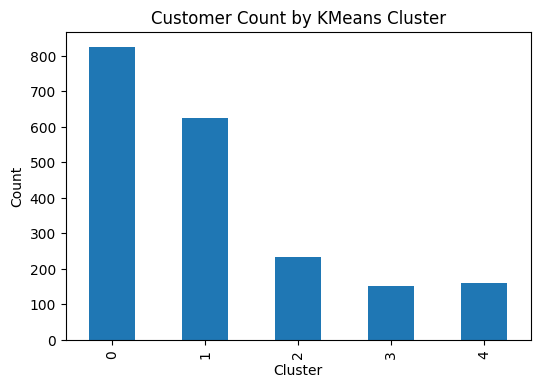

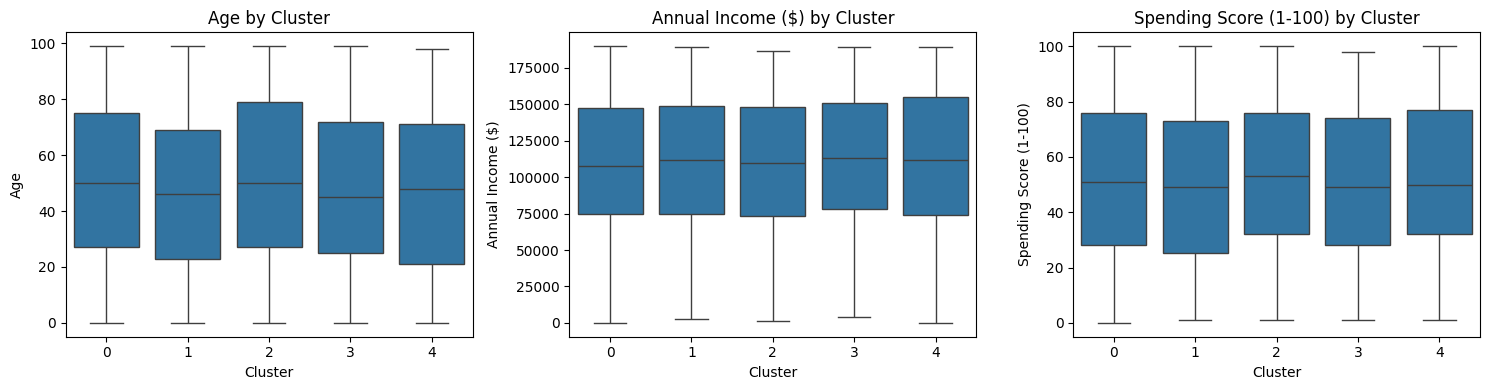

In [28]:
# Profile cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                         columns=X.columns)
print("Cluster centroids (unscaled):\n", centroids[num_cols].round(1))

# Count per cluster bar chart
plt.figure(figsize=(6,4))
df['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Customer Count by KMeans Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Boxplot of key features by cluster
fig, axes = plt.subplots(1,3, figsize=(15,4))
for ax, col in zip(axes, num_cols):
    sns.boxplot(x='Cluster', y=col, data=df, ax=ax)
    ax.set_title(f'{col} by Cluster')
plt.tight_layout()
plt.show()


Accuracy: 0.82


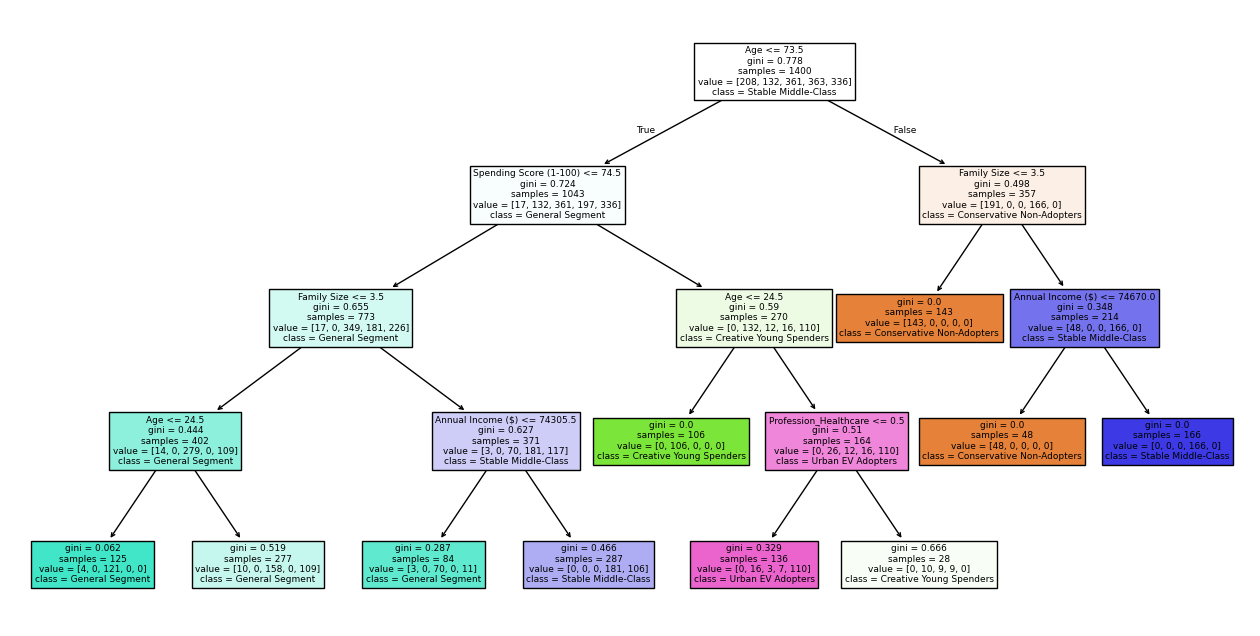

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Prepare features and labels
X = pd.get_dummies(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size', 'Profession']], drop_first=True)
y = df['Segment']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

print(f"Accuracy: {tree.score(X_test, y_test):.2f}")

plt.figure(figsize=(16,8))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()


In [39]:
# Print top 10 feature importances
import pandas as pd

# Create a pandas Series for better readability
feature_importances = pd.Series(tree.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\n🔍 Top Feature Importances in Decision Tree:")
print(feature_importances.head(10).to_markdown())



🔍 Top Feature Importances in Decision Tree:
|                          |         0 |
|:-------------------------|----------:|
| Age                      | 0.360247  |
| Family Size              | 0.277651  |
| Annual Income ($)        | 0.208326  |
| Spending Score (1-100)   | 0.125441  |
| Profession_Healthcare    | 0.0283351 |
| Profession_Doctor        | 0         |
| Profession_Engineer      | 0         |
| Profession_Entertainment | 0         |
| Profession_Executive     | 0         |
| Profession_Homemaker     | 0         |


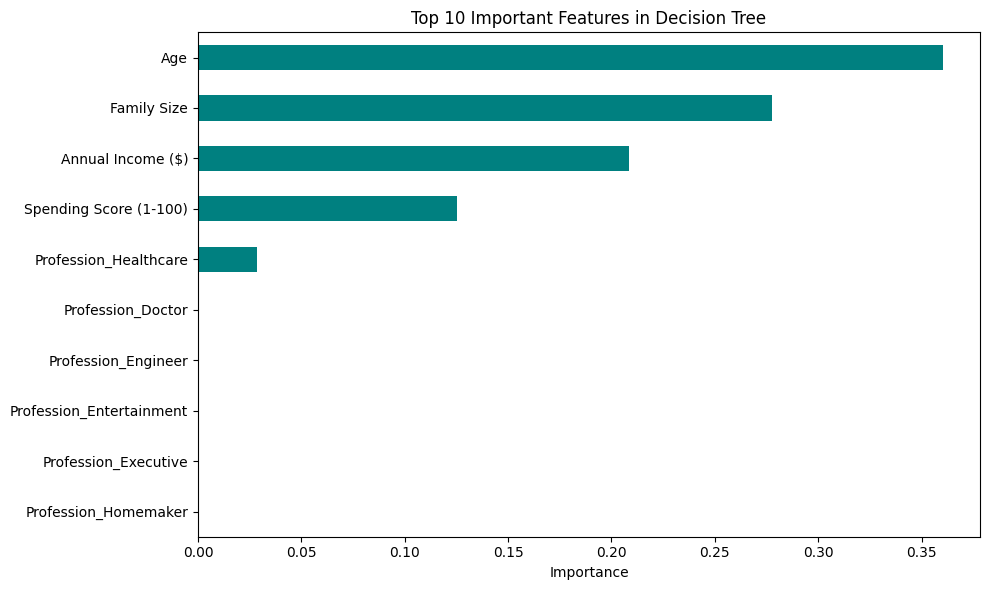

In [40]:
# Plot top features
plt.figure(figsize=(10,6))
feature_importances.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features in Decision Tree")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# ✅ Final Conclusion

# This project conducted a comprehensive demographic segmentation analysis for an Electric Vehicle (EV) startup aiming to identify ideal early adopters in the Indian market. Through structured EDA, clustering, and rule-based segmentation, five distinct customer segments were defined and validated using decision trees.

# 🔹 **Key Insights:**
# - **Urban EV Adopters**: High income, mid-aged professionals with small families and high spending scores — best suited for compact 4W EVs.
# - **Creative Young Spenders**: Young, low–mid income, high-spending individuals — ideal for 2W EVs or flexible payment models.
# - **Stable Middle-Class**: Mid-income families with larger household sizes — target with affordable 4W EVs and family-focused features.
# - **Conservative Non-Adopters**: Elderly or homemakers with moderate spending — require educational efforts and financial incentives.
# - **General Segment**: Diverse consumers not strongly associated with any behavioral trend — potential for future psychographic/geographic segmentation.

# 🔍 **Decision Tree validation** confirmed the top predictors of segment membership are:
# 1. **Age** — most influential
# 2. **Family Size** — distinguishes middle-class vs. urban adopters
# 3. **Income** — separates premium adopters from budget-conscious groups
# 4. **Spending Score** — behavioral indicator of openness to innovation

# 🎯 This segmentation strategy will guide product positioning, pricing, and launch targeting for EV models, ensuring alignment with real market behavior and increasing the likelihood of successful adoption in early markets.
